# Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Simple Regression

In [2]:
x = np.arange(9)
y = x + 1

In [3]:
print(x)
print(y)

[0 1 2 3 4 5 6 7 8]
[1 2 3 4 5 6 7 8 9]


In [4]:
print(x.shape,y.shape)

(9,) (9,)


In [5]:
x = np.reshape(x,(9,1))

In [12]:
print(x.shape,y.shape)

(9, 1) (9,)


In [15]:
x = np.reshape(x,(-1,1))

In [16]:
print(x.shape,y.shape)

(9, 1) (9,)


In [17]:
print("x, y values=",x,y)
print("x, y shape=",x.shape,y.shape)

x, y values= [[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]] [1 2 3 4 5 6 7 8 9]
x, y shape= (9, 1) (9,)


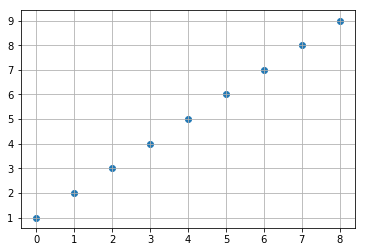

In [18]:
plt.scatter(x,y)
plt.grid()

In [19]:
# MODEL CREATION
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# TRAINING
model.fit(x,y) # x is 1st argument and y is 2nd argument

# PREDICTION
predicted=model.predict(x) # prediction on x to find predicted_y
print("predicted",predicted)
print("actual",y)

predicted [1. 2. 3. 4. 5. 6. 7. 8. 9.]
actual [1 2 3 4 5 6 7 8 9]


In [20]:
# WHAT HAPPENS UNDER THE HOOD IN TRAINING
model = LinearRegression()
print(vars(model))
model.fit(x,y)
print(vars(model))

{'fit_intercept': True, 'normalize': False, 'copy_X': True, 'n_jobs': 1}
{'fit_intercept': True, 'normalize': False, 'copy_X': True, 'n_jobs': 1, 'coef_': array([1.]), '_residues': 1.1947299393451176e-30, 'rank_': 1, 'singular_': array([7.74596669]), 'intercept_': 0.9999999999999991}


In [21]:
print(model.coef_) # Slope of the liner line
print(model.intercept_) # Intercept of the linear line
print(model._residues) # Error

[1.]
0.9999999999999991
1.1947299393451176e-30


In [22]:
# Calling PREDICTION

model.predict(50)

array([51.])

In [24]:
# Calling PREDICTION

model.predict(50,51)

TypeError: predict() takes 2 positional arguments but 3 were given

In [25]:
# Calling PREDICTION

model.predict([ [50] , [51] ])

array([51., 52.])

In [26]:
# Calling PREDICTION

two_rows = np.reshape([50,51],(-1,1))
model.predict(two_rows)

array([51., 52.])

## Regression on Noisy Data

In [27]:
# Real data is alwasys noisy
def create_linear_regression_data(points,slope,intercept,noise=False,noise_std=1):
    x = [0]*points
    y = [0]*points
    if noise:
        random_noise = np.random.random_integers(low=-noise_std,high = noise_std,size=points)
    for i in range(0,points):
        x[i]= i+intercept
        y[i] = slope * float(x[i]) + intercept
        if noise:
            y[i] = y[i] + random_noise[i] # Noise is only in observation
        
    x = np.array(x)
    x = np.reshape(x,(-1,1))
    y = np.array(y)
    return x,y

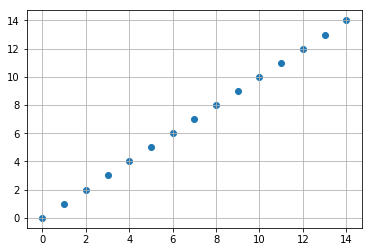

In [30]:
x,y=create_linear_regression_data(points=15,slope=1,intercept=0)
plt.scatter(x,y)
plt.grid()

In [ ]:
print("x, y values=",x.tolist(),y)
print("x, y shape= ",x.shape,y.shape)


/Users/ajinkyak/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: This function is deprecated. Please call randint(-505, 505 + 1) instead
  


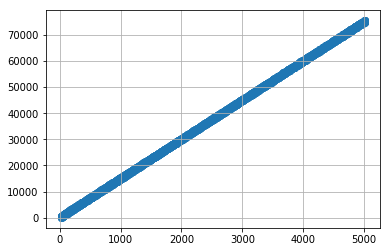

In [39]:
x,y=create_linear_regression_data(points=5000,slope=15,intercept=19,noise=True,noise_std=505)
plt.scatter(x,y)
plt.grid()

In [40]:
model = LinearRegression()
model.fit(x,y)
predicted=model.predict(x)
print("predicted\t\t",predicted)
print("actual (contains noise)\t",y)

predicted		 [  310.25352394   325.25471052   340.25589711 ... 75271.18290289
 75286.18408948 75301.18527606]
actual (contains noise)	 [  578.  -105.  -101. ... 75311. 75500. 75580.]


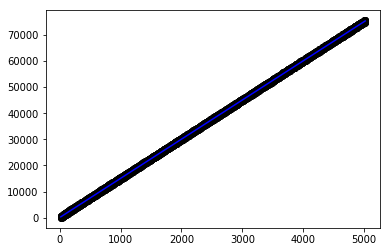

In [41]:
# Plotting the model

plt.scatter(x, y,  color='black')
plt.plot(x, predicted, color='blue')

In [42]:
print(model.coef_) # Slope of the liner line
print(model.intercept_) # Intercept of the linear line
print(model._residues) # Error

[15.00118659]
25.230978768100613
425765717.7513605


In [45]:
!conda install mlxtend -c conda-forge -y

Solving environment: / ^C
failed

CondaError: KeyboardInterrupt



In [43]:
# Plotting the model using mlxtend
# if mlxtend not found then install mlxtend by " !conda install mlxtend -c conda-forge -y "
from mlxtend.plotting import plot_linear_regression
plot_linear_regression(x, y,model = model)
plt.grid()

ModuleNotFoundError: No module named 'mlxtend'

## Understanding regression as curve fitting

- Extend the line and find y for corresponding x

In [ ]:
model.predict(2.5) # NEW POINT

In [ ]:
model.predict(2) # OLD POINTS

## Accuracy of of Regression => Error

In [46]:
print(model._residues) # Error

425765717.7513605


In [47]:
# Model Accuracy

from sklearn.metrics import r2_score
r2_score(y,predicted)

## Use r2_score because explicit is better than implicit

0.999818401674436

In [48]:
# Model Accuracy

from sklearn.metrics import r2_score
r2_score(y_true=y,y_pred=predicted)

0.999818401674436

In [49]:
# Model Error

from sklearn.metrics import mean_squared_error
mean_squared_error(y,predicted)

85153.14355027206

In [ ]:
# Model Error

from sklearn.metrics import mean_squared_error
mean_squared_error(y_true=y,y_pred=predicted)

85153.14355027206

### Mock Test & Test
- If final test is same as mock test, scores will be higher 

### Train Data & Test Data
- If testing data is same as training data, accuracy will be higher & error will be lower

In [51]:
# Without train test split

x,y=create_linear_regression_data(points=100,slope=1,intercept=0,noise=True,noise_std=7)

model = LinearRegression()
model.fit(x,y)

predicted=model.predict(x)

from sklearn.metrics import r2_score
print("r2 score",r2_score(y,predicted))
from sklearn.metrics import mean_squared_error
print("mean squared error",mean_squared_error(y,predicted))

r2 score 0.9791512389122173
mean squared error 17.02556531653165


/Users/ajinkyak/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: This function is deprecated. Please call randint(-7, 7 + 1) instead
  


In [53]:
# With train test split

x,y=create_linear_regression_data(points=100,slope=1,intercept=0,noise=True,noise_std=7)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=5)

model = LinearRegression()
model.fit(x_train,y_train)

predicted=model.predict(x_test)
from sklearn.metrics import r2_score
print("r2 score",r2_score(y_test,predicted))
from sklearn.metrics import mean_squared_error
print("mean squared error",mean_squared_error(y_test,predicted))
vars(model)

r2 score 0.989451830427691
mean squared error 4.652164708171156


/Users/ajinkyak/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: This function is deprecated. Please call randint(-7, 7 + 1) instead
  


{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': 1,
 'coef_': array([0.99301421]),
 '_residues': 1308.6402473452824,
 'rank_': 1,
 'singular_': array([277.56458708]),
 'intercept_': 0.15697391426246554}

In [54]:
# Understanding train and test split

x,y=create_linear_regression_data(points=100,slope=1,intercept=0,noise=True,noise_std=7)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size=0.10)

/Users/ajinkyak/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: This function is deprecated. Please call randint(-7, 7 + 1) instead
  


In [55]:
print(x.shape,y.shape)

(100, 1) (100,)


In [56]:
# Understanding test_size

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(90, 1) (10, 1) (90,) (10,)


In [57]:
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size=0.10)

print(x_train[:5].tolist(),y_train[:5])

[[24], [80], [96], [48], [11]] [31. 79. 97. 50. 16.]


In [58]:
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size=0.10)

print(x_train[:5].tolist(),y_train[:5])

[[26], [36], [22], [52], [56]] [27. 38. 20. 56. 56.]


In [59]:
# Understanding random_state
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=5)
print(x_train[:5].tolist(),y_train[:5])

[[97], [37], [70], [40], [60]] [100.  32.  77.  47.  53.]


In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=5)
print(x_train[:5].tolist(),y_train[:5])

[[97], [37], [70], [40], [60]] [100.  32.  77.  47.  53.]


## Train & Test split to avoid overfitting
- Overfitting = Remembering the training
- When final test contains same questions as practise test, everyone will score high.
- To check actual performance, we need different questions for final test.
- Same for machine learning Algorithm
- Create training data just for training, testing data just for testing

In [97]:
# Sample Data Generator
from sklearn.datasets.samples_generator import make_regression

x,y = make_regression(n_samples=10000, n_features=10, noise=10,random_state=0)

In [98]:
print(x.shape,y.shape)

(10000, 10) (10000,)


In [99]:
x

array([[-1.13821436, -0.42291035, -0.96469356, ..., -0.32786441,
         0.49647227,  0.15313318],
       [ 0.28431452,  0.22246316, -1.2406246 , ...,  0.06749226,
        -0.08837552,  0.09837791],
       [-0.56980221, -1.79810139,  0.28836209, ...,  0.48025188,
        -1.51336979,  0.62168709],
       ...,
       [-0.09628461, -0.34363263,  0.13704679, ..., -0.08851534,
        -1.70194007,  1.36453843],
       [-0.02250954,  0.27555391,  0.42024749, ..., -0.16190684,
         0.30630247, -0.1489594 ],
       [-0.12655798,  0.28920686,  0.96408653, ..., -0.36629325,
         0.22815338,  0.18889664]])

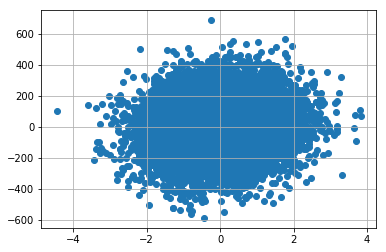

In [100]:
plt.scatter(x[:,0],y)
plt.grid()

In [101]:
# Complete with 10 features

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_regression


#x,y = make_regression(n_samples=10000, n_features=10, noise=10,random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=0)

model = LinearRegression()

model.fit(x_train,y_train)

predicted=model.predict(x_test)

from sklearn.metrics import r2_score
print("r2 score",r2_score(y_test,predicted))
from sklearn.metrics import mean_squared_error
print("mean squared error",mean_squared_error(y_test,predicted))

r2 score 0.9959799993920853
mean squared error 100.1128052521377


In [102]:
vars(model)

{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': 1,
 'coef_': array([19.90377844, 91.08284742, 38.99020286, 19.4225956 , 22.89767894,
        79.23423869, 22.97306558, 14.4493147 , 85.91179228,  8.88560537]),
 '_residues': 900573.9085386895,
 'rank_': 10,
 'singular_': array([96.8425067 , 96.51553737, 95.7825493 , 95.29987395, 94.66629804,
        94.44829327, 93.81405425, 93.64872014, 92.31782654, 91.91176124]),
 'intercept_': 0.0791751739573141}

In [78]:
from mlxtend.plotting import plot_linear_regression

for i in range(0,x.shape[1]):
    plt.figure()
    plot_linear_regression(x[:,i], y,model = model)
    plt.grid()

r2 score 0.9988448306336747
mean squared error 23.01890679756361


ModuleNotFoundError: No module named 'mlxtend'

## Statsmodel

In [107]:
import statsmodels.api as sm

x,y=create_linear_regression_data(15,1,0)

model = sm.OLS(y, x) # Note the swap of x and y
# sm.OLS(x=x, y=y)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.392e+32
Date:                Sun, 24 Jun 2018   Prob (F-statistic):          4.93e-220
Time:                        17:05:12   Log-Likelihood:                 486.47
No. Observations:                  15   AIC:                            -970.9
Df Residuals:                      14   BIC:                            -970.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0000   6.47e-17   1.55e+16      0.0

/Users/ajinkyak/anaconda2/envs/py3/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [108]:
import statsmodels.api as sm

x,y=create_linear_regression_data(15,1,0)
x = sm.add_constant(x)

model = sm.OLS(y, x) # Note the swap of x and y
# sm.OLS(x=x, y=y)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.098e+32
Date:                Sun, 24 Jun 2018   Prob (F-statistic):          2.06e-202
Time:                        17:05:35   Log-Likelihood:                 490.85
No. Observations:                  15   AIC:                            -977.7
Df Residuals:                      13   BIC:                            -976.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.387e-15   7.85e-16     -3.040      0.0

/Users/ajinkyak/anaconda2/envs/py3/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [109]:
vars(results)

{'_results': <statsmodels.regression.linear_model.OLSResults at 0x1c1a6690b8>,
 '__doc__': '\n    Results class for for an OLS model.\n\n    Most of the methods and attributes are inherited from RegressionResults.\n    The special methods that are only available for OLS are:\n\n    - get_influence\n    - outlier_test\n    - el_test\n    - conf_int_el\n\n    See Also\n    --------\n    RegressionResults\n\n    '}

In [106]:
vars(results._results)

{'params': array([-2.3869795e-15,  1.0000000e+00]),
 'model': <statsmodels.regression.linear_model.OLS at 0x1c1a64b390>,
 'k_constant': 1,
 '_data_attr': [],
 'normalized_cov_params': array([[ 0.24166667, -0.025     ],
        [-0.025     ,  0.00357143]]),
 '_cache': {'wresid': array([ 2.38697950e-15,  2.22044605e-15,  1.99840144e-15,  1.33226763e-15,
          1.33226763e-15,  1.77635684e-15,  8.88178420e-16,  8.88178420e-16,
          8.88178420e-16,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         -1.77635684e-15, -1.77635684e-15, -1.77635684e-15]),
  'eigenvals': array([1025.9060579,    4.0939421]),
  'condition_number': 15.830074148053722,
  'ssr': 3.315989141048167e-29,
  'centered_tss': 280.0,
  'rsquared': 1.0,
  'nobs': 15.0,
  'rsquared_adj': 1.0,
  'ess': 280.0,
  'mse_model': 280.0,
  'mse_resid': 2.5507608777293592e-30,
  'fvalue': 1.0977116767184028e+32,
  'f_pvalue': 2.0610223039254935e-202,
  'llf': 490.8478865172492,
  'aic': -977.6957730344984,
  'bic': -97

**StatsModel**
- More like R
- Limited functionality, Regression and Time Series Analysis only

**Scikit-learn**
- Uniform API, Easy to use algorithms, Good documentation & Sensible Defaults
- Focused on CS aspect
- Complete functionality. Majority of algorithms implemented


**R**
- API is not uniform, different packages have different syntax, scattered or sparse documentation
- Better statistical analysis
- Complete functionality. All possible algorithms available via individual packages